<a href="https://colab.research.google.com/github/lorenzopagliuzzi/quantitative-finance/blob/main/Stock_market_portfolio_strategy_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run this line if you are using Google Colab
!pip install yahoo_fin

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import yahoo_fin.stock_info as si

Before creating our portfolio, we took one single stock for better understand the strategy

In [6]:
stock = "AAPL"

# let's import earning history
earning_df = pd.DataFrame(si.get_earnings_history(stock))

# we convert date column in a date, then we use it as index
earning_df["startdatetime"] = pd.to_datetime(earning_df["startdatetime"]).dt.date
earning_df.set_index(["startdatetime"], inplace=True)
# we sort index from old dates to recent dates
earning_df.sort_index(inplace=True, ascending=True)

# this dataframe may have duplicate rows, we just delete them
earning_df = earning_df[~earning_df.index.duplicated(keep='first')]

print(f"Earning history dataframe for {stock}:")
earning_df

Earning history dataframe for AAPL:


,ticker,companyshortname,eventname,startdatetimetype,epsestimate,epsactual,epssurprisepct,timeZoneShortName,gmtOffsetMilliSeconds,quoteType
startdatetime,,,,,,,,,,
1998-01-14,AAPL,Apple Inc.,None,TAS,0.01,0.01,22.30,EST,-18000000,EQUITY
1998-04-15,AAPL,Apple Inc.,None,TAS,0.01,0.01,156.52,EDT,-14400000,EQUITY
1998-07-15,AAPL,Apple Inc.,None,TAS,0.01,0.02,68.49,EDT,-14400000,EQUITY
1998-10-14,AAPL,Apple Inc.,None,TAS,0.02,0.02,39.92,EDT,-14400000,EQUITY
1999-01-13,AAPL,Apple Inc.,None,TAS,0.02,0.03,12.79,EST,-18000000,EQUITY
...,...,...,...,...,...,...,...,...,...,...
2022-10-27,AAPL,Apple Inc.,None,TAS,1.27,1.29,1.57,EDT,-14400000,EQUITY
2023-01-25,AAPL,Apple Inc,Q1 2023 Earnings Release,TNS,2.01,NaN,NaN,EST,-18000000,EQUITY
2023-04-26,AAPL,Apple Inc,Q2 2023 Earnings Release,TNS,NaN,NaN,NaN,EDT,-14400000,EQUITY


In [7]:
# the price dataset is already a pandas dataframe, we just store the dataset in 'price_df' variable
price_df = si.get_data(stock)
print(f"Price dataframe for {stock}: ")
price_df

Price dataframe for AAPL: 


,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600,AAPL
...,...,...,...,...,...,...,...
2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000,AAPL
2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800,AAPL
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111380900,AAPL
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71176600,AAPL


In [10]:
# these 2 dataframes have the same index type and order. We can concatenate them together.
df_price_and_earning = pd.concat((price_df, earning_df[["epsestimate", "epsactual","epssurprisepct"]]), axis=1)

# we remove any row that has an index grater than today
df_price_and_earning = df_price_and_earning[df_price_and_earning.index < pd.Timestamp('today')]

print("Price and earning dataframe merged together: ")
df_price_and_earning

Price and earning dataframe merged together: 


,open,high,low,close,adjclose,volume,ticker,epsestimate,epsactual,epssurprisepct
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600.0,AAPL,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800.0,AAPL,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000.0,AAPL,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600.0,AAPL,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600.0,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000.0,AAPL,NaN,NaN,NaN
2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800.0,AAPL,NaN,NaN,NaN
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111380900.0,AAPL,NaN,NaN,NaN
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71176600.0,AAPL,NaN,NaN,NaN


## Strategy explanation
- If EPS (Earning Per Share) is greater than expected means a positive parameters. We go long from the next day to N days later
- If EPS is lower than expected means a negative parameters. We go short from the next day to N days later
- If EPS is the same as expected we do nothing

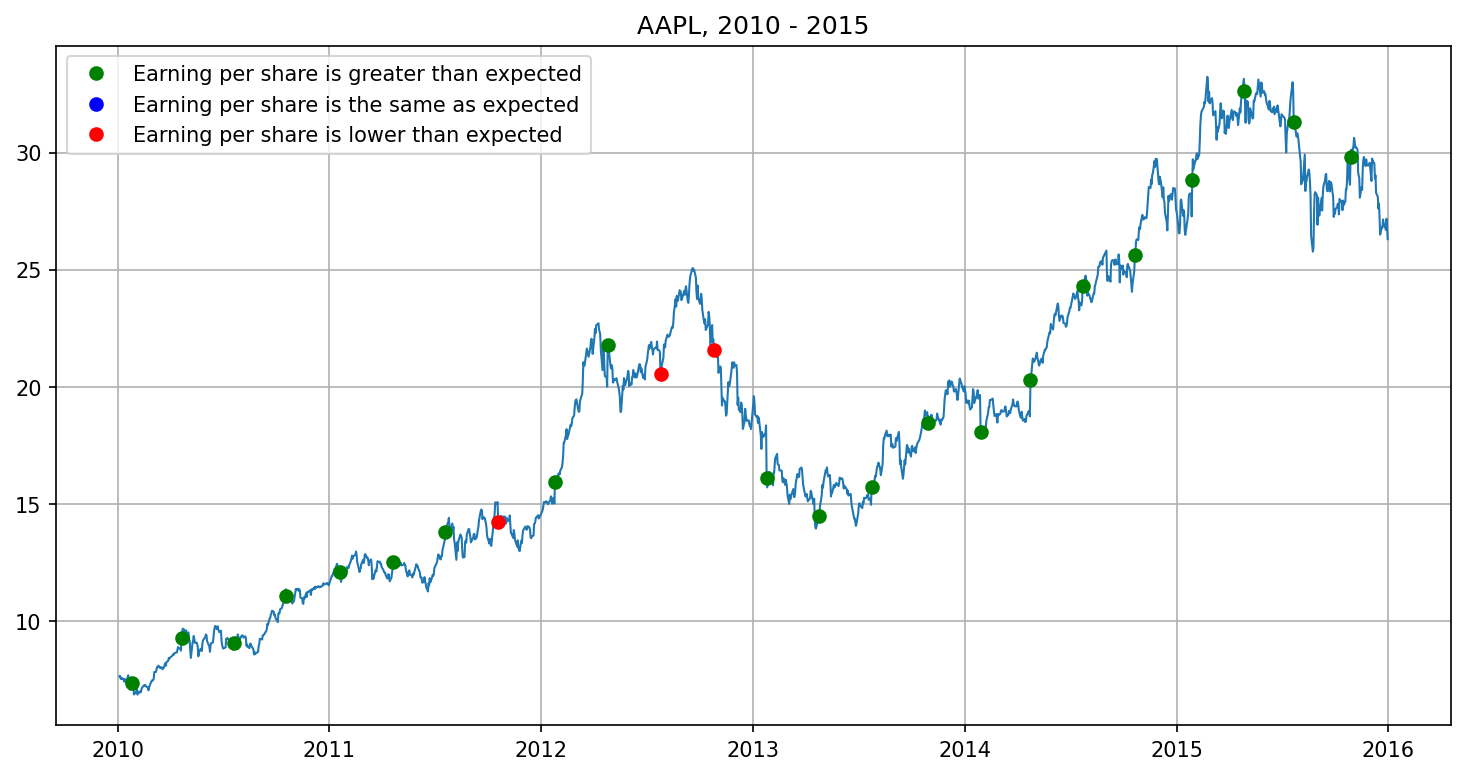

In [12]:
# we zoom the graph in this time range 2010 to 2015 included.
plot_from = 2010
plot_to = 2015
limits=(df_price_and_earning.index.year >= plot_from) & (df_price_and_earning.index.year <= plot_to)

plt.figure(figsize=(12,6), dpi=150)
# we plot price of the stock
plt.plot(df_price_and_earning[limits]["close"], linewidth=1)

plt.plot(
    # we always use .shift(1) for getting the eps info because we always operate the day after the eps announcement.
    pd.DataFrame(np.where(df_price_and_earning["epsactual"].shift(1)-df_price_and_earning["epsestimate"].shift(1) > 0, df_price_and_earning["close"], np.nan), index=df_price_and_earning.index)[limits],
    marker="o",
    color="green",
    linewidth=0,
    label="Earning per share is greater than expected"
)
plt.plot(
    pd.DataFrame(np.where(df_price_and_earning["epsactual"].shift(1)-df_price_and_earning["epsestimate"].shift(1) == 0, df_price_and_earning["close"], np.nan), index=df_price_and_earning.index)[limits],
    marker="o",
    color="blue",
    linewidth=0,
    label="Earning per share is the same as expected"
)
plt.plot(
    pd.DataFrame(np.where(df_price_and_earning["epsactual"].shift(1)-df_price_and_earning["epsestimate"].shift(1) < 0, df_price_and_earning["close"], np.nan), index=df_price_and_earning.index)[limits],
    marker="o",
    color="red",
    linewidth=0,
    label="Earning per share is lower than expected"
)
plt.grid()
plt.title(f"{stock}, {plot_from} - {plot_to}")
plt.legend()
plt.show();

It seems there is a bit of correlation beetween EPS expectations and price in the following days.

## Backtest

Now we apply our strategy on Apple.

- If EPS is greater than expected we go long for 45 days, starting from the next day.
- If EPS is lower than expected we go short for 45 days, starting from the next day.
- If EPS is the same as expected we do nothing.

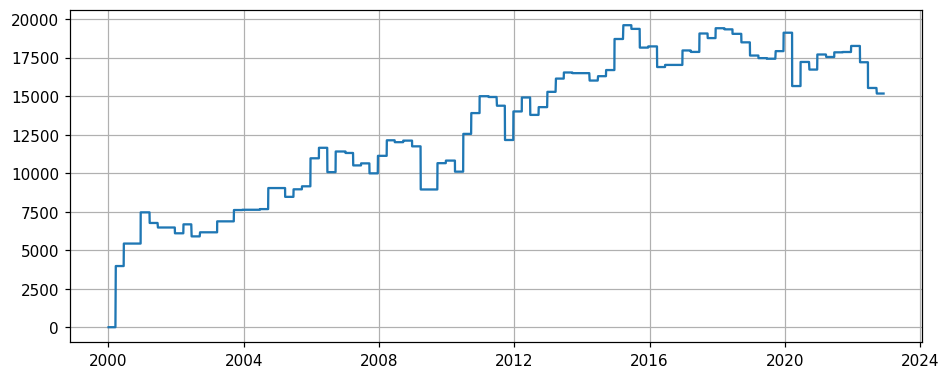

In [31]:
# we will use this function also later
def execute_backtest_calculations(backtest, DAYS_IN_MARKET, DOLLAR_PER_OPERATION):
  
  # fill next N nan value with 1 if it find mp=1, or -1 if mp=-1
  backtest["mp"].fillna(method="ffill", limit=DAYS_IN_MARKET-1, inplace=True)

  # if it is the beginning of our trade, the entry price is the open price
  backtest["entry_price"] = np.where((backtest["mp"].shift(1).isnull()) & (backtest["mp"].notnull()), backtest["open"], np.nan)
  # we propagate entry_price for the next rows for making calculation
  backtest["entry_price"].fillna(method="ffill", inplace=True)

  # since we have a fixed price per operations we need to calculate the maximun number of stock we can buy with 10000 dollars. It is an integer number.
  backtest["number_of_stocks"] = np.where((backtest["mp"].shift(1).isnull()) & (backtest["mp"].notnull()), round(DOLLAR_PER_OPERATION/backtest["open"],0), np.nan)
  # we propagate number_of_stocks for the next rows for making calculation
  backtest["number_of_stocks"].fillna(method="ffill", inplace=True)

  # open_operations is the equity for every trade in real time
  backtest["open_operations"] = backtest["mp"] * backtest["number_of_stocks"] * (backtest["close"] - backtest["entry_price"])
  # after N days in market we close trade at the next open
  backtest["open_operations"] = np.where((backtest["mp"].notnull()) & (backtest["mp"].shift(-1).isnull()),
                                        backtest["mp"] * backtest["number_of_stocks"] * (backtest["open"].shift(-1) - backtest["entry_price"]),
                                        backtest["open_operations"])
  
  # operations it's the final result of a trade
  backtest["operations"] = np.where((backtest["mp"].notnull()) & (backtest["mp"].shift(-1).isnull()), backtest["open_operations"], np.nan)

  # closed equity is the equity of a closed trade, we propagate it forward to calculate open_equity
  backtest["closed_equity"] = backtest["operations"].fillna(0).cumsum()  
  backtest["open_equity"] = backtest["closed_equity"] + backtest["open_operations"] - backtest["operations"].fillna(0)
  return backtest


backtest = pd.DataFrame(df_price_and_earning.copy())
# in this example we go long for 45 days if eps is greater than expected. And we go short for 45 days if eps is lower than expected.
DAYS_IN_MARKET = 45
DOLLAR_PER_OPERATION = 10000

# mp means Market Position. 1=long, -1=short, 0=nothing
# long rules
backtest["mp"] = np.where(backtest["epsactual"].shift(1)-backtest["epsestimate"].shift(1) > 0, 1, np.nan)
# short rules
backtest["mp"] = np.where(backtest["epsactual"].shift(1)-backtest["epsestimate"].shift(1) < 0, -1, backtest["mp"])

backtest = execute_backtest_calculations(backtest, DAYS_IN_MARKET, DOLLAR_PER_OPERATION)
plt.figure(figsize=(10,4), dpi=110)
plt.plot(backtest[backtest.index.year >= 2000]["closed_equity"])
plt.grid()

In this case the strategy performed well, now we want apply it to a portfolio of 20 stocks too see if it's a common pattern or it was only a case.

## Portfolio construction
We took a list of stocks that are at least in the market from year 2000

In [32]:
stock_list = ['PG','MMC','ADBE','INTC','JNJ','JPM','WMT','KO','TGT','NVDA', 'BAC', 'PFE', 'HD', 'DIS', 'UPS', 'CMCSA', 'AAPL', 'MSFT', 'WMT', 'IBM', 'BLK']

# dict_df is a dictionary that will contain a dataframe for every stock.
dict_df={}

# it should took 20 - 30 seconds
for stock in stock_list:     

  # we are importing price and eps data in a dataframe
  # every dataframe created will be inserted in the dictionary 'dict_df'

  # it is the same import method as before
  earning_df = pd.DataFrame(si.get_earnings_history(stock))
  earning_df["startdatetime"] = pd.to_datetime(earning_df["startdatetime"]).dt.date
  earning_df.set_index(["startdatetime"], inplace=True)
  earning_df.sort_index(inplace=True, ascending=True)
  earning_df = earning_df[~earning_df.index.duplicated(keep='first')]

  price_df = si.get_data(stock)

  df_price_and_earning = pd.concat((price_df, earning_df[["epsestimate", "epsactual","epssurprisepct"]]), axis=1)
  df_price_and_earning = df_price_and_earning[df_price_and_earning.index < pd.Timestamp('today')]
  
  dict_df[stock] = df_price_and_earning

# if we call for example dict_df['ADBE'] we view the dataframe for Adobe.
# dict_df['ADBE']

In [33]:
print("These are our stocks in portfolio:")
output=""
list_len = len(stock_list)
for i in range(list_len):
  output = output + stock_list[i] 
  if i < list_len-1:
    output = output + ", "
print(output)

These are our stocks in portfolio:
PG, MMC, ADBE, INTC, JNJ, JPM, WMT, KO, TGT, NVDA, BAC, PFE, HD, DIS, UPS, CMCSA, AAPL, MSFT, WMT, IBM, BLK


## Portfolio Backtest

### In-sample Backtest

I've choose the In-sample period from 2000 to 2015. 

15 years where we can see how the strategy performed on our portfolio and where we are allowed to change parameters of the strategy.

In this case the strategy has only 1 parameter, number days of in the market for every trade.

In [34]:
IN_SAMPLE_START_YEAR = 2000
IN_SAMPLE_END_YEAR = 2015

dict_df_in_sample = {}
for stock, df in dict_df.items():
  dict_df_in_sample[stock] = df[(df.index.year >= IN_SAMPLE_START_YEAR) & (df.index.year <= IN_SAMPLE_END_YEAR)]

#### Long strategy

In [35]:
def run_single_backtest(dict_df_in_sample, long_strategy, short_strategy, DAYS_IN_MARKET, DOLLAR_PER_OPERATION):

  for stock, dataframe in dict_df_in_sample.items():

    # we need to make changes on a copy of the dataframe to avoid warmings
    df = dataframe.copy()
    
    # we always use .shift(1) for getting the eps info because we always operate the day after the eps announcement.
    if long_strategy:
      # long rules only
      df["mp"] = np.where(df["epsactual"].shift(1)-df["epsestimate"].shift(1) > 0, 1, np.nan)
      if short_strategy:
        # long rules and short rules
        df["mp"] = np.where(df["epsactual"].shift(1)-df["epsestimate"].shift(1) < 0, 1, df["mp"])

    elif short_strategy:
      # short rules only
      df["mp"] = np.where(df["epsactual"].shift(1)-df["epsestimate"].shift(1) < 0, -1, np.nan)

    # execute backtest
    df = execute_backtest_calculations(df, DAYS_IN_MARKET, DOLLAR_PER_OPERATION)

    # update dataframe with backtest results 
    dict_df_in_sample[stock]= df.copy()

  return dict_df_in_sample

DAYS_IN_MARKET = 45
DOLLAR_PER_OPERATION = 10000
long_strategy = True
short_strategy= False
dict_df_in_sample = run_single_backtest(dict_df_in_sample, long_strategy, short_strategy, DAYS_IN_MARKET, DOLLAR_PER_OPERATION)

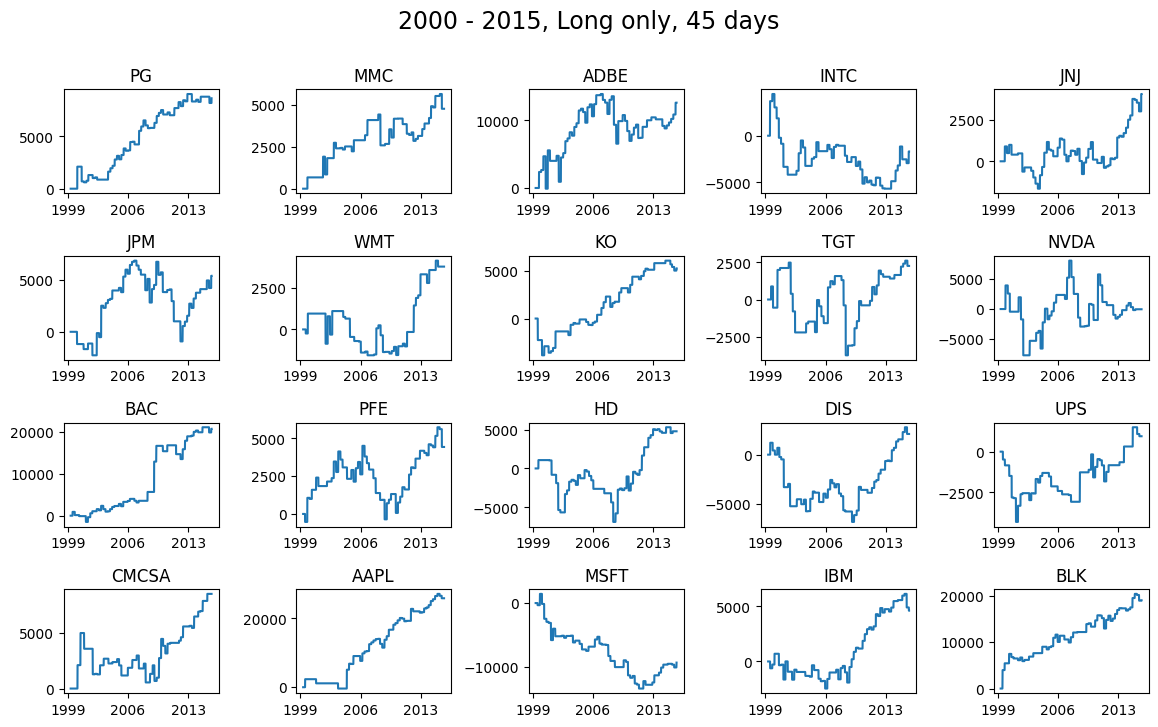

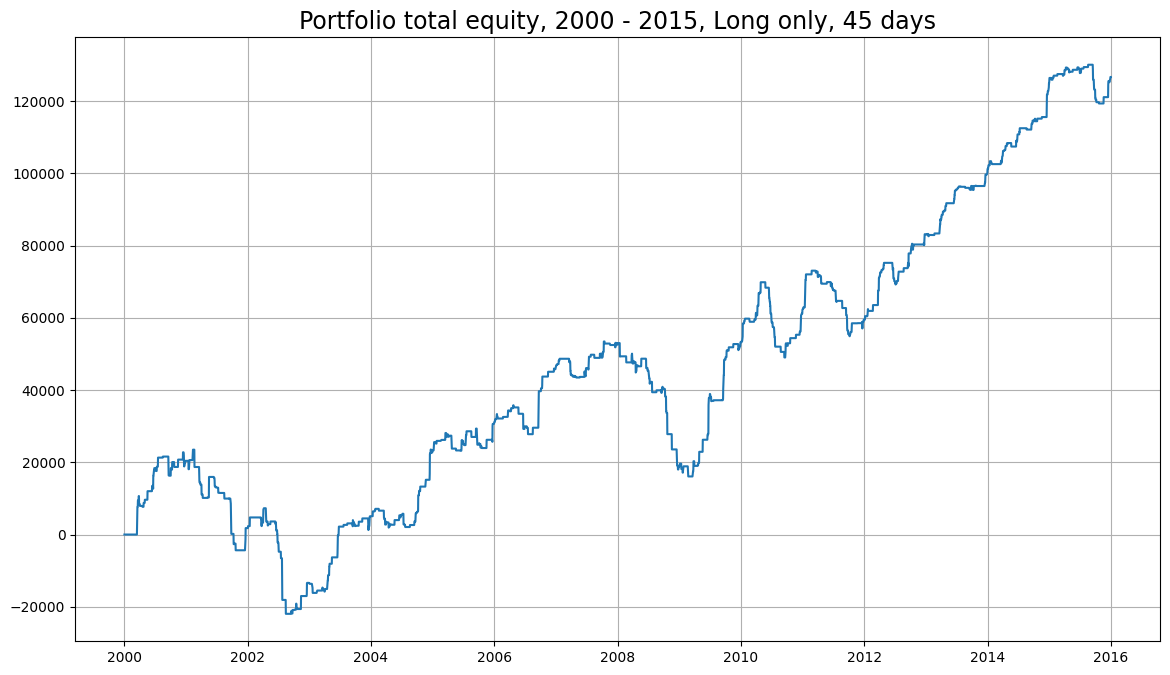

In [36]:
import math
import matplotlib.dates as mdates
from matplotlib import ticker

def plot_multiple_equities(dict_df, title):
  # first we plot strategy results for each stock in grid of 4X5 in this case, becuse we have 20 stocks
  n_cols = 5
  n_rows = math.ceil(len(dict_df.items())/n_cols)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8), dpi=100)

  # for make sure we only see year in x-axis label
  xfmt = mdates.DateFormatter('%Y')

  row = 0
  col = 0
  # we draw the grid of strategy results
  for stock, df in dict_df.items():    
    ax = axes[row][col]
    ax.plot(df["closed_equity"])  
    ax.set_title(stock)  

    # i've used these next 3 rows for plotting only 3 date in x-axis label
    ax.xaxis.set_major_formatter(xfmt)
    xticks = ticker.MaxNLocator(3)
    ax.xaxis.set_major_locator(xticks)

    # after 5 columns create a new row and
    col = col + 1
    if col >= n_cols:
      col = 0
      row = row + 1

  fig.suptitle(title, fontsize=17)
  fig.subplots_adjust(hspace=0.6, wspace=0.5)
  plt.show();

  # equity_sum is the sum of all strategy result of our portfolio
  equity_sum=0
  for stock, df in dict_df.items():  
    equity_sum = equity_sum + df["closed_equity"]
  plt.figure(figsize=(14,8), dpi=100)
  plt.plot(equity_sum)
  plt.title("Portfolio total equity, "+title, fontdict={"fontsize":17})
  plt.grid()

  return

plot_multiple_equities(dict_df_in_sample, '2000 - 2015, Long only, '+str(DAYS_IN_MARKET)+' days')

We must recognize that it is not impassive to the drawdown phases of the markets (2000-2002 and 2008-2009), but it is still a good strategy.

#### Short strategy

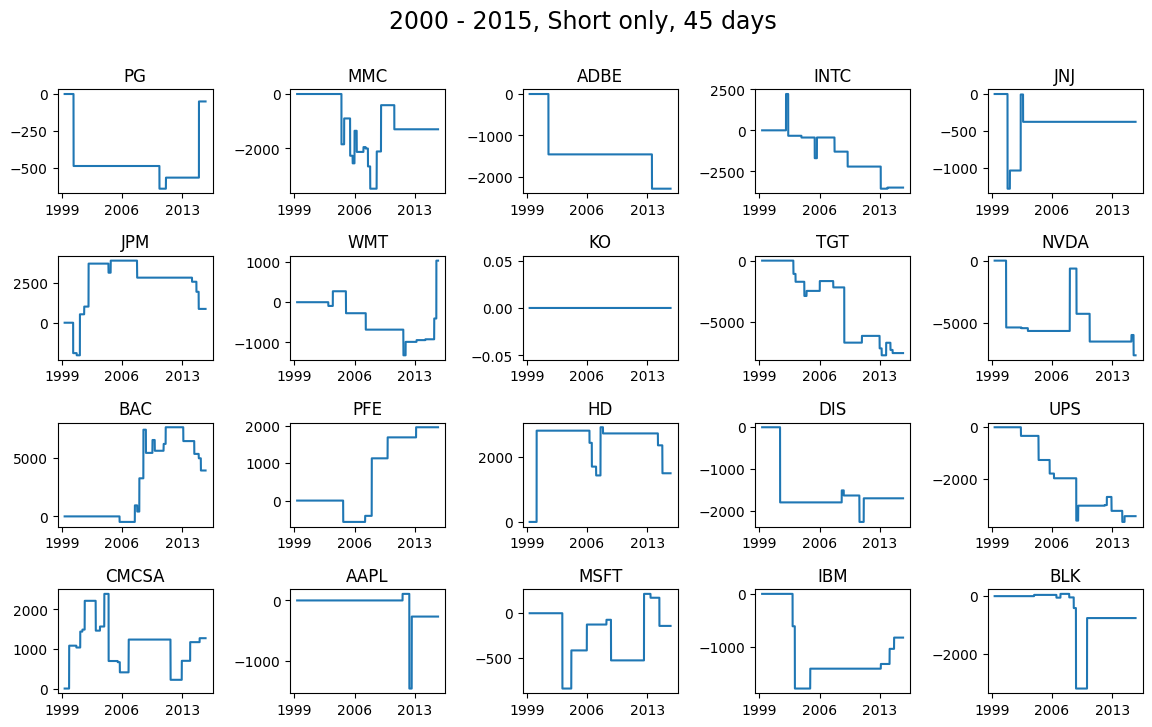

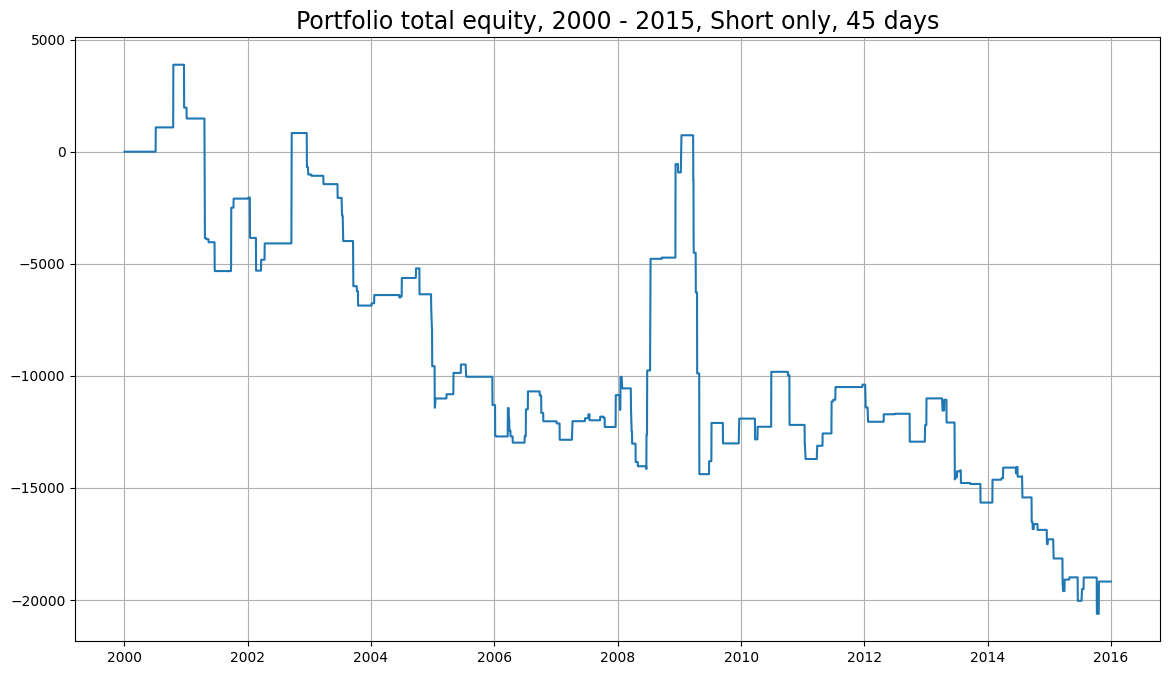

In [37]:
DAYS_IN_MARKET = 45
DOLLAR_PER_OPERATION = 10000
long_strategy = False
short_strategy= True
dict_df_in_sample = run_single_backtest(dict_df_in_sample, long_strategy, short_strategy, DAYS_IN_MARKET, DOLLAR_PER_OPERATION)

plot_multiple_equities(dict_df_in_sample, '2000 - 2015, Short only, '+str(DAYS_IN_MARKET)+' days')

Terrible performance, we should run optimization for check if there are possible profits in the short strategy.

### In-sample Optimization

Now we want to see how the entire portfolio react to different holding period like 5 days, 10 days, 15 days ecc...

In [38]:
in_sample_optimization = {}
for stock, df in dict_df.items():
  in_sample_optimization[stock] = df[(df.index.year >= IN_SAMPLE_START_YEAR) & (df.index.year <= IN_SAMPLE_END_YEAR)]

#### Portfolio long strategy optimization

In [39]:
def make_optimization(dict_df, long_strategy, short_strategy, start, stop, step, DOLLAR_PER_OPERATION):

  # this dictionary will keep optimization results
  dict_equity_result_per_params={}

  for days_in_market in range(start,stop+step,step):    
    dict_df = run_single_backtest(dict_df, long_strategy, short_strategy, days_in_market, DOLLAR_PER_OPERATION)   

    equity_sum=0
    for stock, df in dict_df.items():  
      equity_sum = equity_sum + df["closed_equity"]
    dict_equity_result_per_params[days_in_market]=equity_sum

  return dict_equity_result_per_params

long_strategy = True
short_strategy = False
start = 5
stop = 50
step = 5
DOLLAR_PER_OPERATION = 10000
dict_equity_result_per_params = make_optimization(in_sample_optimization, True, False, start, stop, step, DOLLAR_PER_OPERATION)   

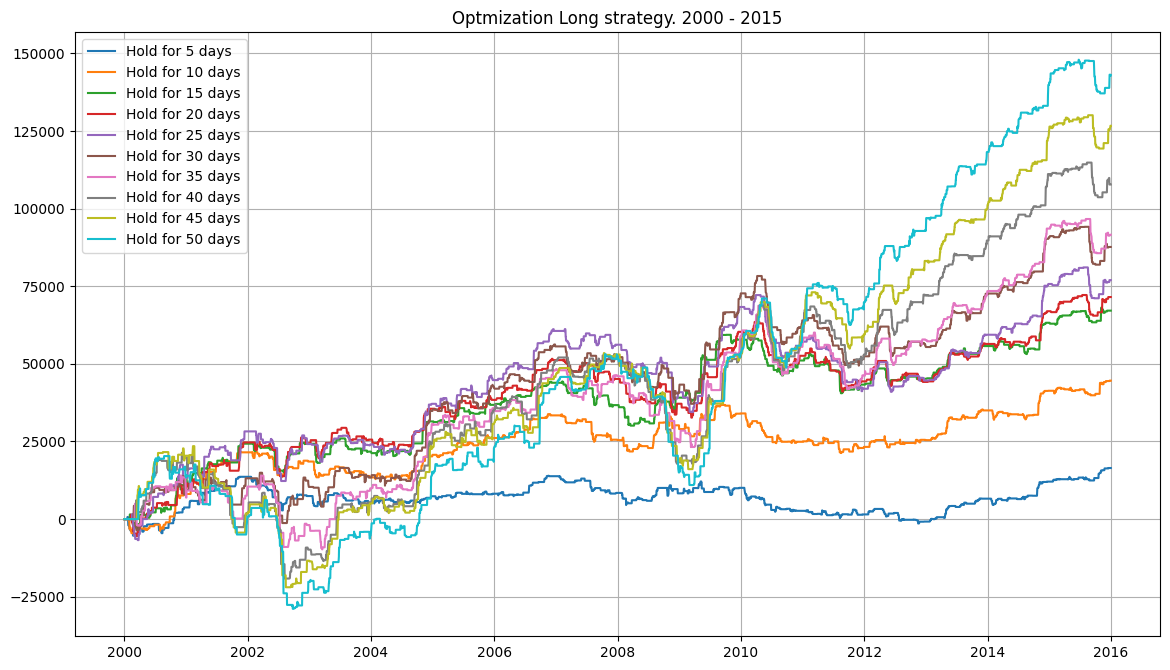

In [42]:
def plot_optmization_result(dict_equity_result_per_params, title): 
  plt.figure(figsize=(14,8), dpi=100)
  for params, result in dict_equity_result_per_params.items():
    plt.plot(result, label="Hold for "+str(params)+" days")
  plt.legend() 
  plt.grid()
  plt.title(title)
  return

plot_optmization_result(dict_equity_result_per_params, "Optmization Long strategy. "+str(IN_SAMPLE_START_YEAR)+" - "+str(IN_SAMPLE_END_YEAR))

The least volatile zone is between 25 and 30 days.

The area with the most profit, at the expense of the drawdown, is between 45 and 50 days

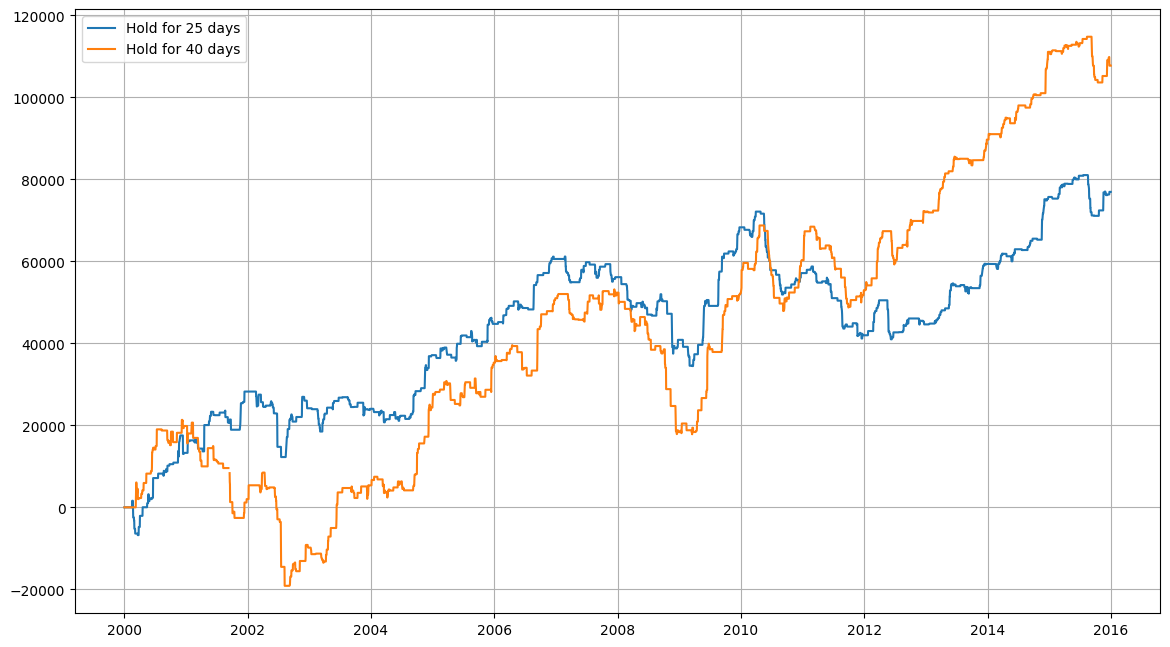

In [48]:
plt.figure(figsize=(14,8), dpi=100)
plt.plot(dict_equity_result_per_params[25], label="Hold for 25 days")
plt.plot(dict_equity_result_per_params[40], label="Hold for 40 days")
plt.legend()
plt.grid()

#### Portfolio short strategy optimization

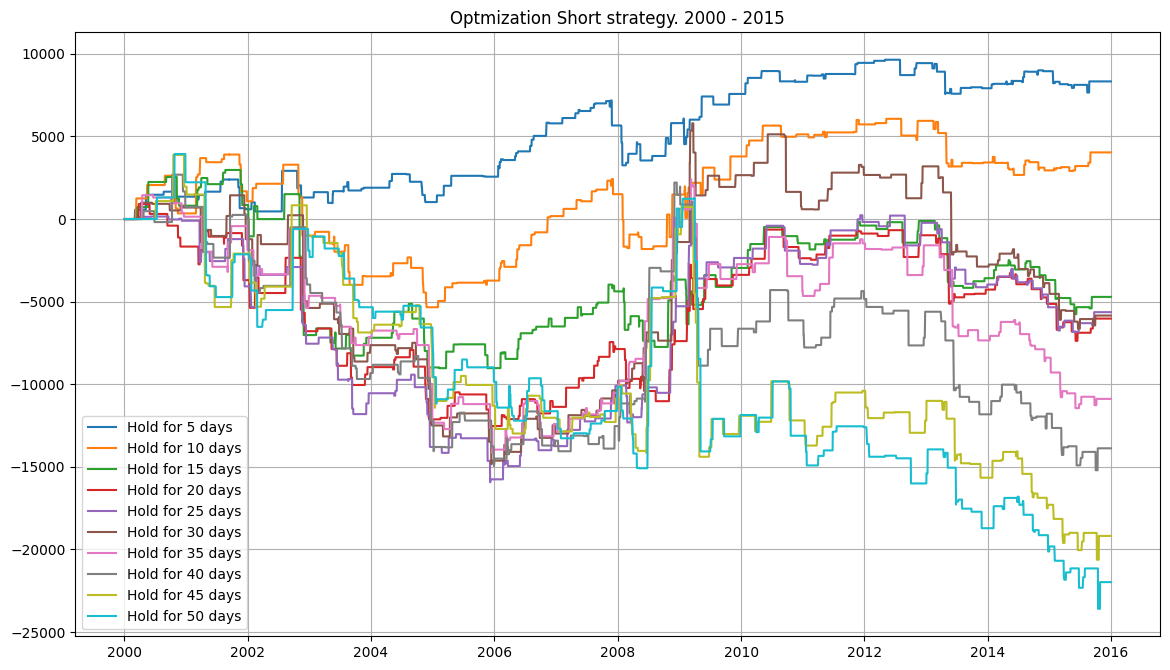

In [ ]:
long_strategy = False
short_strategy = True
start = 5
stop = 50
step = 5
DOLLAR_PER_OPERATION = 10000
dict_equity_result_per_params = make_optimization(in_sample_optimization, long_strategy, short_strategy, start, stop, step, DOLLAR_PER_OPERATION)   
plot_optmization_result(dict_equity_result_per_params, "Optmization Short strategy. 2000 - 2015")

As we can see the short strategy doesn't perform well, excepct for 5 days.

We can run another optimization fro 2 to 7 days to see if there are any profit.

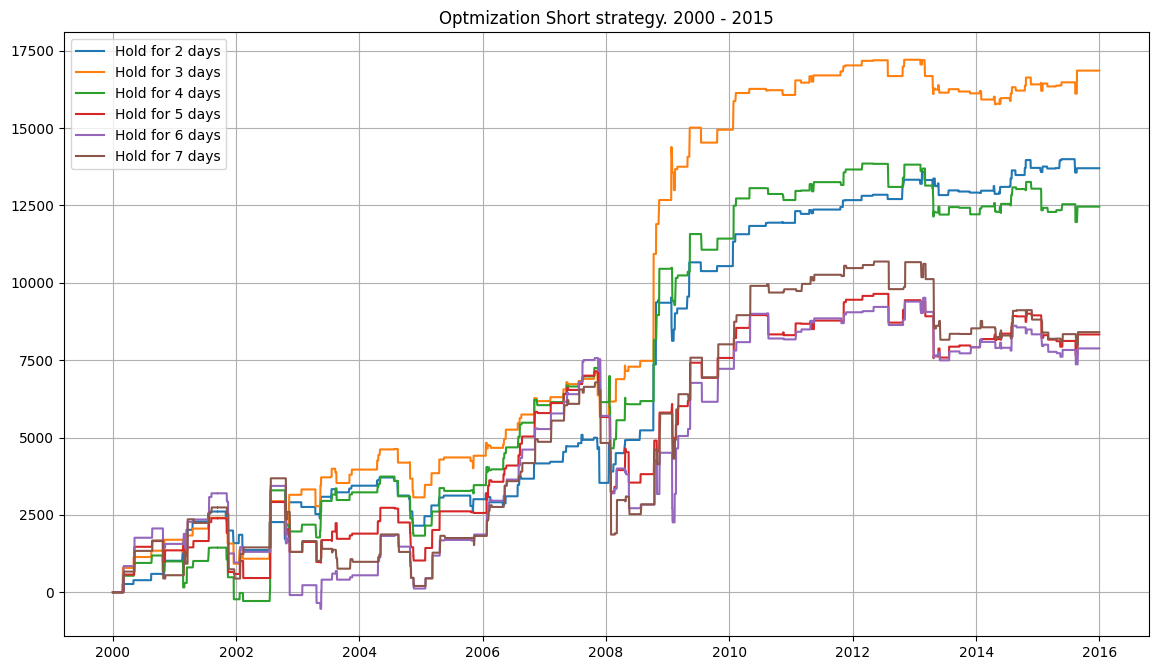

In [ ]:
long_strategy = False
short_strategy = True
start = 2
stop = 7
step = 1
DOLLAR_PER_OPERATION = 10000
dict_equity_result_per_params = make_optimization(in_sample_optimization, long_strategy, short_strategy, start, stop, step, DOLLAR_PER_OPERATION)  
plot_optmization_result(dict_equity_result_per_params, "Optmization Short strategy. 2000 - 2015")

We can say that when an EPS is lower than expectactions, markets tend to go short in the following 2 - 4 days.

### Out-of-sample validation

Since we built the strategy on the basis of data from 2000 to 2015 we can now validate it from 2016 to today (almost 7 year).

In [46]:
OUT_OF_SAMPLE_START_YEAR = 2016
OUT_OF_SAMPLE_END_YEAR = 2022

dict_df_out_of_sample = {}
for stock, df in dict_df.items():
  dict_df_out_of_sample[stock] = df[(df.index.year >= OUT_OF_SAMPLE_START_YEAR) & (df.index.year <= OUT_OF_SAMPLE_END_YEAR)]

#### Portfolio long strategy validation

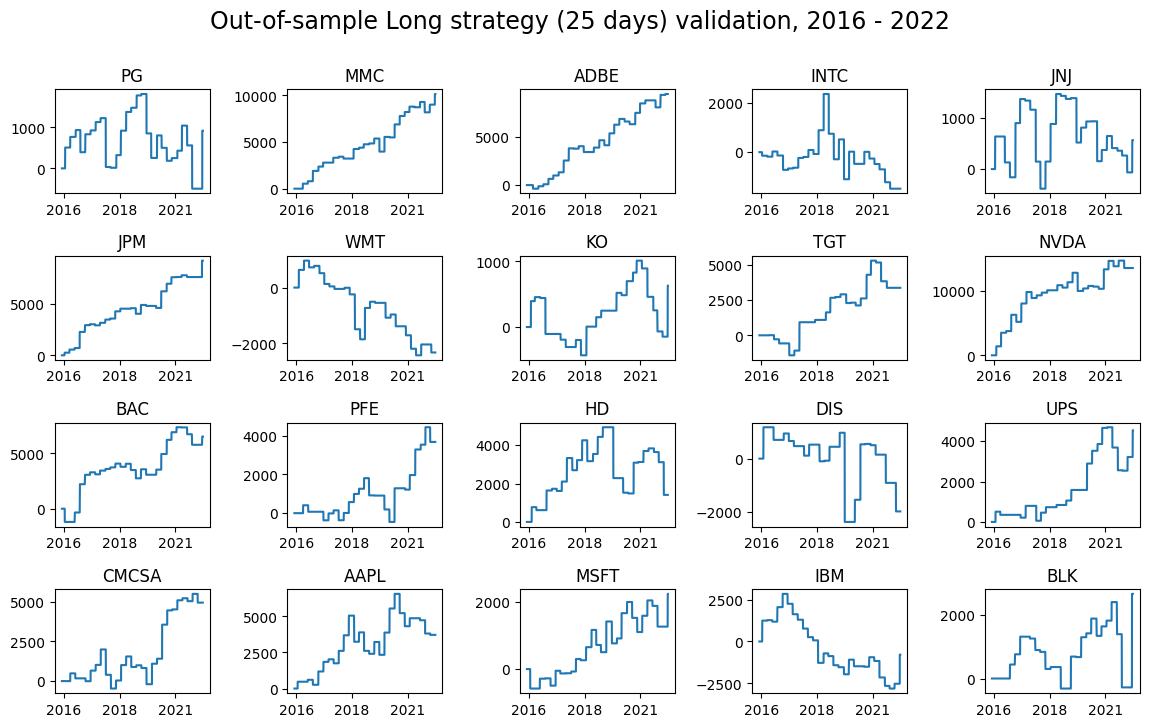

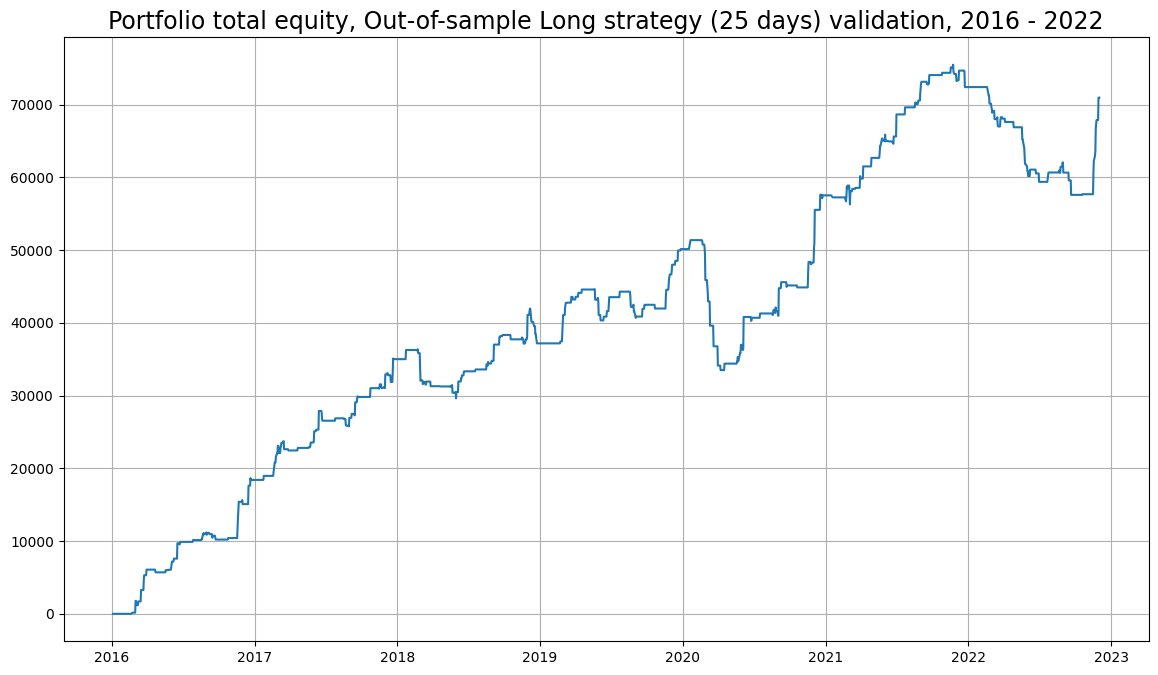

In [47]:
DAYS_IN_MARKET = 25
DOLLAR_PER_OPERATION = 10000
long_strategy = True
short_strategy= False
dict_df_out_of_sample = run_single_backtest(dict_df_out_of_sample, long_strategy, short_strategy, DAYS_IN_MARKET, DOLLAR_PER_OPERATION)
plot_multiple_equities(dict_df_out_of_sample, 'Out-of-sample Long strategy ('+str(DAYS_IN_MARKET)+' days) validation, 2016 - 2022')

Also in this case the long strategy suffered a market crisis in 2020, to then recover and continue the upward trend. It's a good sign.

#### Portfolio short strategy validation

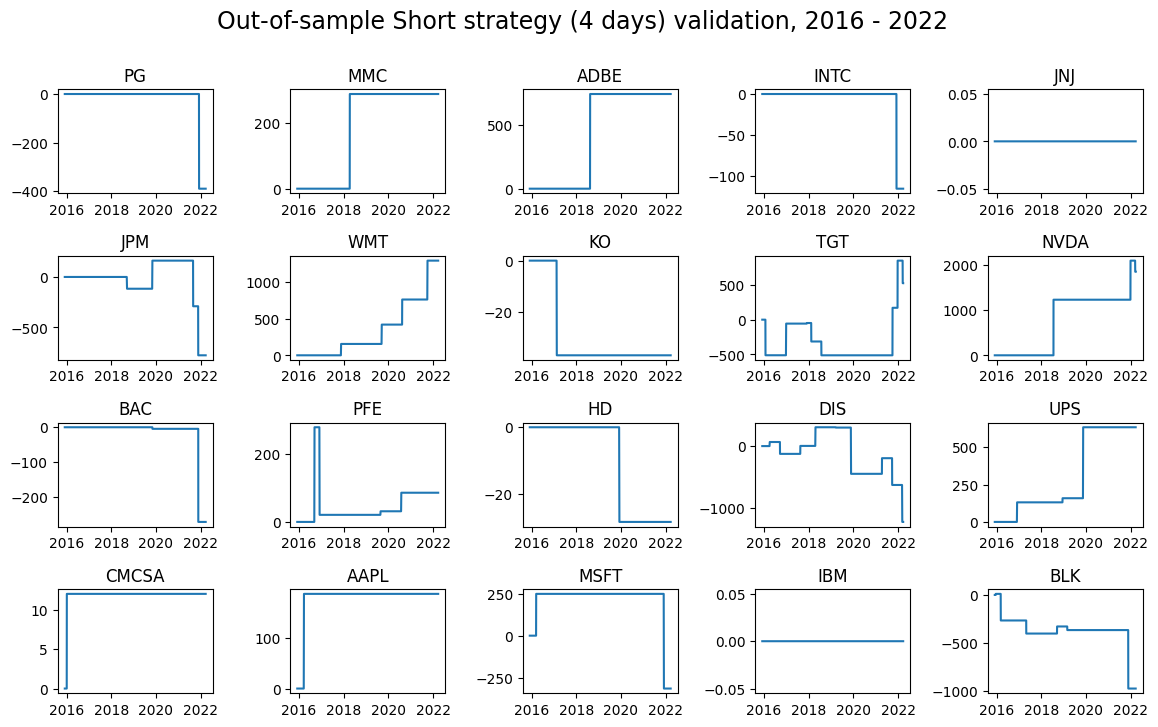

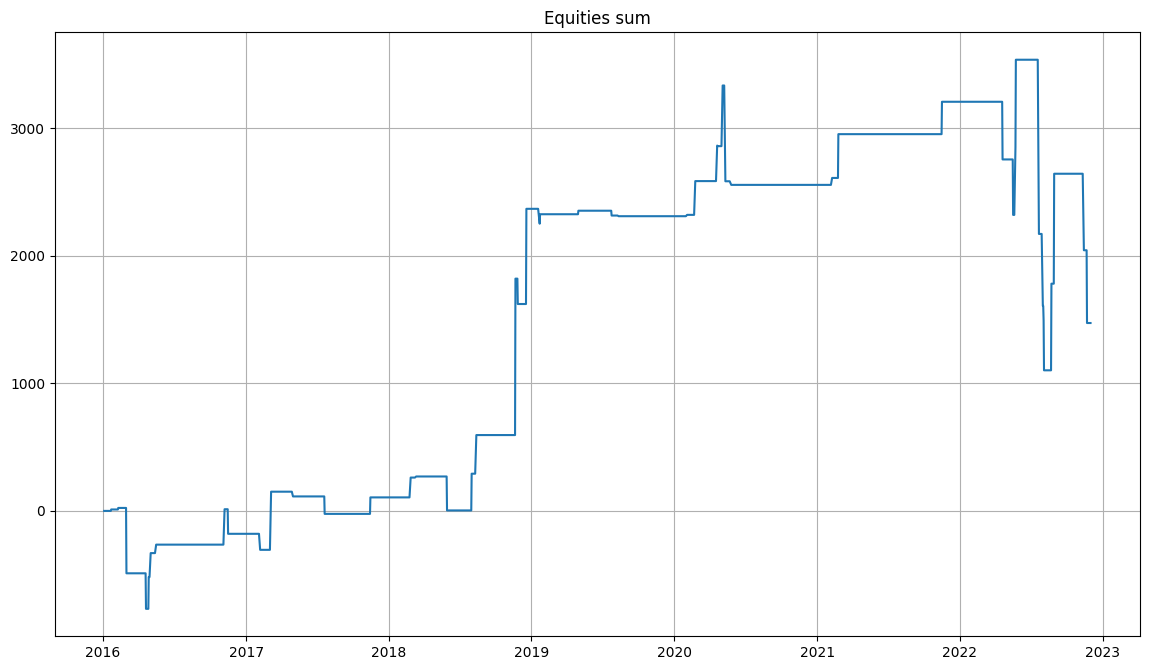

In [ ]:
DAYS_IN_MARKET = 4
DOLLAR_PER_OPERATION = 10000
long_strategy = False
short_strategy= True
dict_df_out_of_sample_short = run_single_backtest(dict_df_out_of_sample, long_strategy, short_strategy, DAYS_IN_MARKET, DOLLAR_PER_OPERATION)
plot_multiple_equities(dict_df_out_of_sample_short, 'Out-of-sample Short strategy ('+str(DAYS_IN_MARKET)+' days) validation, 2016 - 2022')

Unfortunately the short does not give too many satisfactions.

I think the problem is that it gives few trades, we should at least double the number of stocks for the short strategy to have a better understanding.